# What is the most optimal skill to learn for Data Analysts?

## Methodology

1. Group skills to determine median salary and likelihood of being in posting
2. Visualize median salary vs percent skill demand
4. Determine if certain technologies are more prevalent

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import ast 
import seaborn as sns

#Loading Data
df = pd.read_csv('/Users/robertocortez/Desktop/data_jobs.csv')

# Data Cleanup 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Converting job_skills column from str to list
df['job_skills'] = df['job_skills'].apply(
    lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) and pd.notna(skill_list) else skill_list
) 

In [5]:
# Creating a new dataframe that filters for only data analyst jobs in the United States

df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

In [8]:
# Dropping rows with missing salary data & exploding the job_skills column

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US_exploded = df_DA_US.explode('job_skills')
df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [15]:
# Grouping by job_skills and aggregating the median salary 
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

# Renaming the columns
df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US)

# Calculating the percentage of job postings that mention each skill
df_DA_skills['skill_percent'] = (df_DA_skills['skill_count'] / DA_job_count) * 100


skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


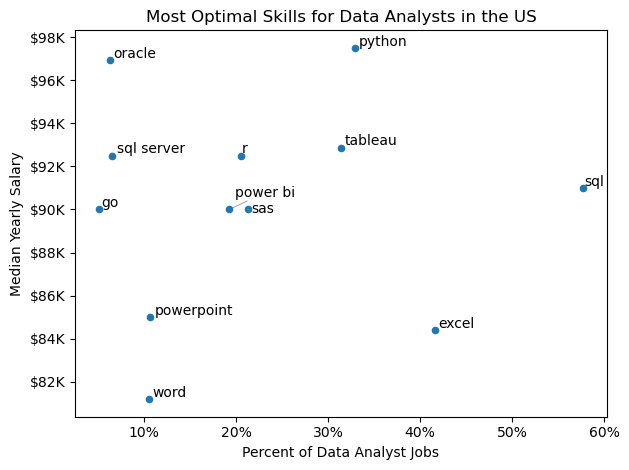

In [32]:
from adjustText import adjust_text

df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='grey', lw=0.5))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title(f'Most Optimal Skills for Data Analysts in the US')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x)}%'))

# Adjust layout and display plot
plt.tight_layout()
plt.show()

In [33]:
# Creating a dictionary of all technologies mentioned in the job_type_skills column
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['spreadsheet',
  'visio',
  'msaccess',
  'sas',
  'dax',
  'powerbi',
  'looker',
  'sap',
  'cognos',
  'ssis',
  'esquisse',
  'qlik',
  'powerpoint',
  'excel',
  'ms access',
  'alteryx',
  'microstrategy',
  'outlook',
  'word',
  'sharepoint',
  'datarobot',
  'nuix',
  'tableau',
  'spss',
  'ssrs',
  'sheets',
  'splunk',
  'power bi'],
 'programming': ['erlang',
  'apl',
  'no-sql',
  'nosql',
  'fortran',
  'solidity',
  'sql',
  'pascal',
  'ocaml',
  'powershell',
  'visual basic',
  'sas',
  'ruby',
  'go',
  'vba',
  'perl',
  'rust',
  'elixir',
  'groovy',
  'c#',
  'c++',
  'golang',
  'julia',
  'kotlin',
  'shell',
  'mongo',
  'f#',
  'haskell',
  'r',
  'lisp',
  'mongodb',
  'php',
  'matlab',
  'clojure',
  'cobol',
  'objective-c',
  't-sql',
  'bash',
  'delphi',
  'visualbasic',
  'dart',
  'typescript',
  'swift',
  'scala',
  'html',
  'javascript',
  'c',
  'sass',
  'css',
  'java',
  'crystal',
  'vb.net',
  'assembly',
  'python',
  '

In [34]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,spreadsheet
0,analyst_tools,visio
0,analyst_tools,msaccess
0,analyst_tools,sas
0,analyst_tools,dax
...,...,...
9,sync,twilio
9,sync,webex
9,sync,wire
9,sync,mattermost


In [35]:
# merge df_DA_skills and df_technology
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.0,57.655172,programming,sql
1,1808,84392.0,41.563218,analyst_tools,excel
2,1431,97500.0,32.896552,programming,python
3,1364,92875.0,31.356322,analyst_tools,tableau
4,926,90000.0,21.287356,analyst_tools,sas
...,...,...,...,...,...
169,1,160515.0,0.022989,databases,couchbase
170,1,100000.0,0.022989,libraries,chainer
171,1,85000.0,0.022989,other,chef
172,1,113269.5,0.022989,libraries,cordova


In [37]:
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_percent]

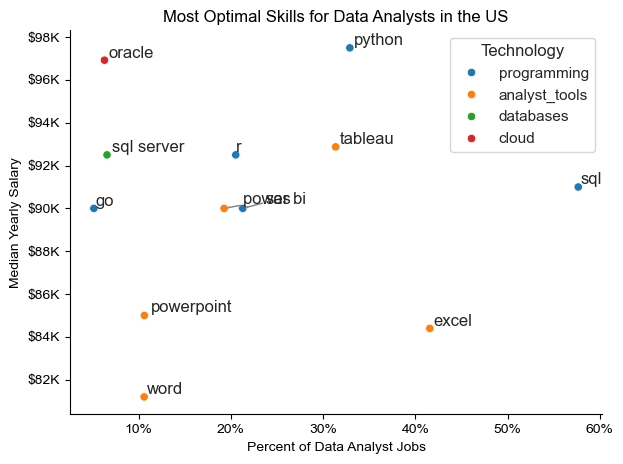

In [38]:
# Using technology_dict to color the scatter plot
sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()
